In [81]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import torch
import pickle

In [82]:
l1, l2, l3 = 0.5, 0.5, 1.
def x_gen():
    x1 = np.random.normal(0,0.25, (1))
    x2_4 = np.random.normal(0,0.5, (3))
    x = np.concatenate((x1, x2_4))
    y1 = l1*np.cos(x[1])+l2*np.cos(x[2]-x[1])+l3*np.cos(x[3]-x[2]-x[1])
    y2 = x[0]+l1*np.sin(x[1])+l2*np.sin(x[2]-x[1])+l3*np.sin(x[3]-x[2]-x[1])
    return x, np.array([y1, y2])

In [58]:
X = np.empty((0,4))
Y = np.empty((0,2))
i=0
while i<=10+10**6:
    x, y = x_gen()
    if y[0]>1.2:
        X = np.vstack((X, np.expand_dims(x,0)))
        Y = np.vstack((Y,np.expand_dims(y,0)))
        i+=1
        if i%10**5==0:
            print('i = ', i)

i =  100000
i =  200000
i =  300000
i =  400000
i =  500000
i =  600000
i =  700000
i =  800000
i =  900000
i =  1000000


In [62]:
print(X.shape, Y.shape)

(1000011, 4) (1000011, 2)


In [63]:
X_tensor = torch.tensor(X, dtype=torch.float)
Y_tensor = torch.tensor(Y, dtype=torch.float)

In [64]:
pickle.dump(X_tensor, open('/home/anna/uni/inverse/final_project/kinematic/X_tensor', 'wb'))
pickle.dump(Y_tensor, open('/home/anna/uni/inverse/final_project/kinematic/Y_tensor', 'wb'))

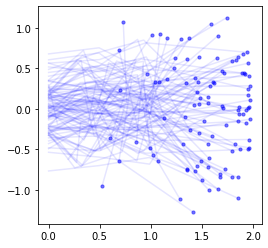

In [99]:
plt.figure(figsize=(4,4))
for i in range(100):
    x1, x2, x3, x4 = X[i]
    y1, y2 = Y[i]
    plt.plot([0, l1*np.cos(x2), l1*np.cos(x2)+l2*np.cos(x3-x2), l1*np.cos(x2)+l2*np.cos(x3-x2)+l3*np.cos(x4-x3-x2)], [x1, x1+l1*np.sin(x2),x1+l1*np.sin(x2)+l2*np.sin(x3-x2), x1+l1*np.sin(x2)+l2*np.sin(x3-x2)+l3*np.sin(x4-x3-x2)], 'b', alpha=0.1)
    plt.scatter(y1, y2, c='b', s=10, alpha=0.5)
plt.show()